   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'conta

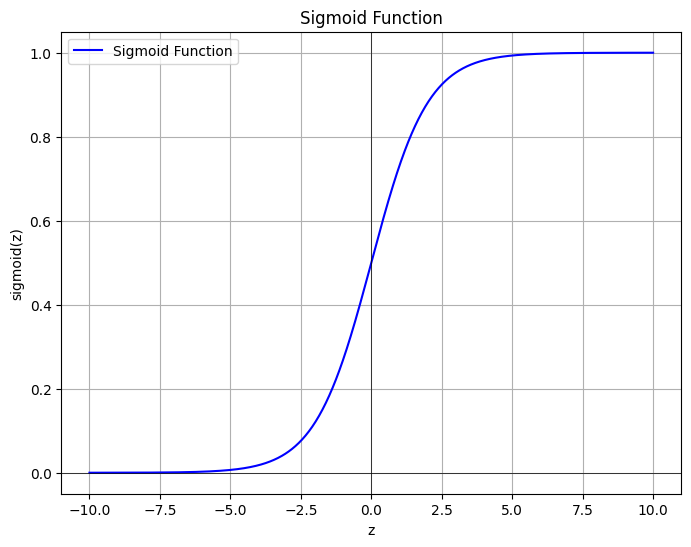

Logistic Regression Accuracy: 73.44%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Load the dataset
df = pd.read_csv('/content/sample_data/bank.csv')

# Display first few rows
print(df.head())

print(df.columns)  # Check the actual column names
df.rename(columns={'deposit': 'y'}, inplace=True)
df['y'] = df['y'].map({'yes': 1, 'no': 0})


# Selecting features and target variable
X = df.drop(columns=['y']).select_dtypes(include=[np.number]).values  # Only numerical features
y = df['y'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sigmoid Function
z_values = np.linspace(-10, 10, 1000)
sigmoid_values = sigmoid(z_values)
plt.figure(figsize=(8, 6))
plt.plot(z_values, sigmoid_values, label='Sigmoid Function', color='b')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# Logistic Regression Class
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.epochs):
            model = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(model)
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = sigmoid(model)
        return [1 if i > 0.5 else 0 for i in predictions]

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')


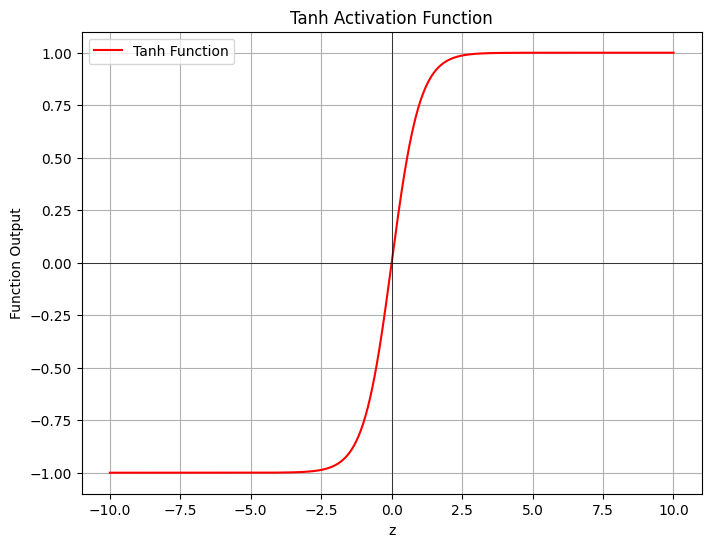

In [ ]:
# Define the Tanh function
def tanh(z):
    return np.tanh(z)

# Plotting the Tanh activation function
z_values = np.linspace(-10, 10, 1000)
tanh_values = tanh(z_values)
plt.figure(figsize=(8, 6))
plt.plot(z_values, tanh_values, label='Tanh Function', color='r')
plt.title('Tanh Activation Function')
plt.xlabel('z')
plt.ylabel('Function Output')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

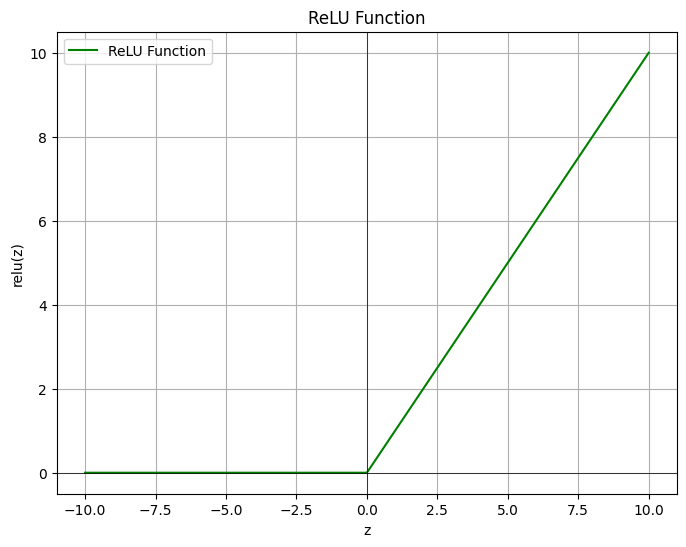

In [ ]:
# Define the ReLU function
def relu(z):
    return np.maximum(0, z)

# Plotting the ReLU function
z_values = np.linspace(-10, 10, 1000)
relu_values = relu(z_values)
plt.figure(figsize=(8, 6))
plt.plot(z_values, relu_values, label='ReLU Function', color='g')
plt.title('ReLU Function')
plt.xlabel('z')
plt.ylabel('relu(z)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# Cross-Entropy Loss for Binary Classification
def compute_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient Descent for Logistic Regression
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = X.shape[0]
    for epoch in range(epochs):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
        if epoch % 100 == 0:
            loss = compute_cross_entropy_loss(y, predictions)
            print(f"Epoch {epoch}, Cross-Entropy Loss: {loss:.4f}")
    return weights


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_descent(X, y, weights, learning_rate, epochs):
    m = X.shape[0]
    for epoch in range(epochs):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
        if epoch % 100 == 0:
            loss = compute_cross_entropy_loss(y, predictions)
            print(f"Epoch {epoch}, Cross-Entropy Loss: {loss:.4f}")
    return weights

# Load the dataset
df = pd.read_csv('/content/sample_data/bank.csv')
print(df.head())

print(df.columns)  # Check the actual column names
df.rename(columns={'deposit': 'y'}, inplace=True)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

weights = np.zeros(X_train.shape[1])
learning_rate = 0.1
epochs = 1000
weights = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

z_test = np.dot(X_test, weights)
y_test_pred_prob = sigmoid(z_test)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

test_loss = compute_cross_entropy_loss(y_test, y_test_pred_prob)
accuracy = np.mean(y_test_pred == y_test)

print(f"\nTest Cross-Entropy Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'conta